In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

In [85]:
# Functions

def is_inside_body(x, y, z):
    return np.sqrt(np.abs(x)) + np.sqrt(np.abs(y)) + np.sqrt(np.abs(z)) <= 1


def density(x, y, z, p):
    return np.sqrt(x**2 + y**2 + z**2)**p


def estimate_mass(num_samples, p=0):
    total_density = 0
    err_sum1 = 0
    err_sum2 = 0
    bounding_box_volumne = 8.

    for _ in range(num_samples):
        x, y, z = np.random.uniform(-1, 1, 3)
        if is_inside_body(x, y, z):

            total_density += density(x, y, z, p)

            err_sum1 += density(x, y, z, p)**2
            err_sum2 += density(x, y, z, p)

    total_mass = (bounding_box_volumne / num_samples) * total_density
    total_mass_err = ((bounding_box_volumne / num_samples) * np.sqrt(num_samples*err_sum1 - err_sum2**2)) / (np.sqrt(num_samples))
    
    return total_mass, total_mass_err


def estimate_center_of_mass(num_samples, p=0):
    total_density = 0
    total_density_x = 0
    total_density_y = 0
    total_density_z = 0

    for _ in range(num_samples):
        x, y, z = np.random.uniform(-1, 1, 3)
        if is_inside_body(x, y, z):
            total_density += density(x, y, z, p)
            total_density_x += density(x, y, z, p) * x
            total_density_y += density(x, y, z, p) * y
            total_density_z += density(x, y, z, p) * z

    center_of_mass_x = total_density_x / total_density
    center_of_mass_y = total_density_y / total_density
    center_of_mass_z = total_density_z / total_density
    
    return center_of_mass_x, center_of_mass_y, center_of_mass_z


def estimate_inertia(num_samples, p=0):
    total_inertia_density_x = 0
    err_sum1_x = 0
    err_sum2_x = 0

    total_inertia_density_y = 0
    err_sum1_y = 0
    err_sum2_y = 0

    total_inertia_density_z = 0
    err_sum1_z = 0
    err_sum2_z = 0
    
    bounding_box_volumne = 8.

    for _ in range(num_samples):
        x, y, z = np.random.uniform(-1, 1, 3)
        if is_inside_body(x, y, z):

            total_inertia_density_x += density(x, y, z, p) * (y**2 + z**2)
            err_sum1_x = density(x, y, z, p)**2 * (y**2 + z**2)**2
            err_sum2_x += density(x, y, z, p) * (y**2 + z**2)

            total_inertia_density_y += density(x, y, z, p) * (x**2 + z**2)
            err_sum1_y = density(x, y, z, p)**2 * (x**2 + z**2)**2
            err_sum2_y += density(x, y, z, p) * (x**2 + z**2)

            total_inertia_density_z += density(x, y, z, p) * (x**2 + y**2)
            err_sum1_z = density(x, y, z, p)**2 * (x**2 + y**2)**2
            err_sum2_z += density(x, y, z, p) * (x**2 + y**2)

    total_inertia_x = (bounding_box_volumne / num_samples) * total_inertia_density_x
    total_inertia_x_err = (bounding_box_volumne / num_samples) * np.sqrt(np.abs(num_samples*err_sum1_x - err_sum2_x**2)) / (np.sqrt(num_samples))
    total_inertia_y = (bounding_box_volumne / num_samples) * total_inertia_density_y
    total_inertia_y_err = (bounding_box_volumne / num_samples) * np.sqrt(np.abs(num_samples*err_sum1_y - err_sum2_y**2)) / (np.sqrt(num_samples))
    total_inertia_z = (bounding_box_volumne / num_samples) * total_inertia_density_z
    total_inertia_z_err = (bounding_box_volumne / num_samples) * np.sqrt(np.abs(num_samples*err_sum1_z - err_sum2_z**2)) / (np.sqrt(num_samples))
    
    return total_inertia_x, total_inertia_y, total_inertia_z, total_inertia_x_err, total_inertia_y_err, total_inertia_z_err

- Prikaz telesa

In [41]:
# Define the range of values for x and y
x = np.linspace(-1, 1, 10000)
y = np.linspace(-1, 1, 10000)

# Create a meshgrid for x and y
x, y = np.meshgrid(x, y)

# Define the equation for the surface z1
z1 = np.where(
    np.sqrt(np.abs(x)) + np.sqrt(np.abs(y)) < 1,
    (1 - np.sqrt(np.abs(x)) - np.sqrt(np.abs(y)))**2,
    np.inf
)

# Define the equation for the surface z2
z2 = np.where(
    np.sqrt(np.abs(x)) + np.sqrt(np.abs(y)) < 1,
    -(1 - np.sqrt(np.abs(x)) - np.sqrt(np.abs(y)))**2,
    np.inf
)

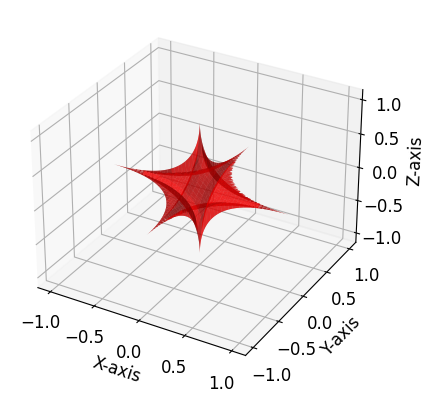

In [35]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces
ax.plot_surface(x, y, z1, color='r', alpha=0.6, label='z = (1 - sqrt(|x|) - sqrt(|y|))^2')
ax.plot_surface(x, y, z2, color='r', alpha=0.6, label='z = -(1 - sqrt(|x|) - sqrt(|y|))^2')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.set_zbound((-1.1, 1.1))

# Show the plot
plt.show()


- računanje mase, težišča in vztrajnostnega momenta

In [100]:
num_samples = np.logspace(3, 7, dtype=int)

In [ ]:

masses = np.zeros_like(num_samples, dtype=float)
masses_err = np.zeros_like(num_samples, dtype=float)

centers_x = np.zeros_like(num_samples, dtype=float)
centers_y = np.zeros_like(num_samples, dtype=float)
centers_z = np.zeros_like(num_samples, dtype=float)

inertias_x = np.zeros_like(num_samples, dtype=float)
inertias_y = np.zeros_like(num_samples, dtype=float)
inertias_z = np.zeros_like(num_samples, dtype=float)
inertias_x_err = np.zeros_like(num_samples, dtype=float)
inertias_y_err = np.zeros_like(num_samples, dtype=float)
inertias_z_err = np.zeros_like(num_samples, dtype=float)

for i, num in enumerate(num_samples):
    masses[i], masses_err[i] = estimate_mass(num)
    centers_x[i], centers_y[i], centers_z[i] = estimate_center_of_mass(num)
    inertias_x[i], inertias_y[i], inertias_z[i], inertias_x_err[i], inertias_y_err[i], inertias_z_err[i] = estimate_inertia(num)

0.088928 0.00026523872470210675


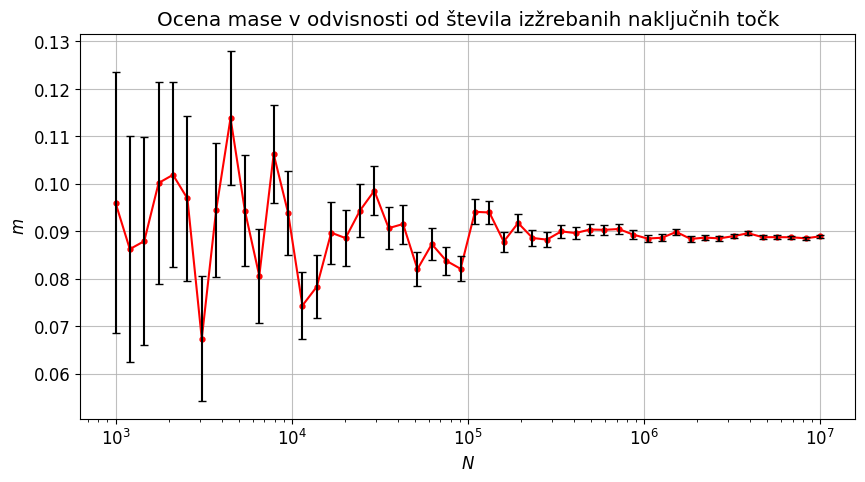

In [97]:
# Masa

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_xscale('log')
ax.set_title('Ocena mase v odvisnosti od števila izžrebanih naključnih točk')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$m$')
ax.errorbar(num_samples, masses, yerr=masses_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red')

print(masses[-1], masses_err[-1])

0.004214885671428323 1.3327915569376433e-06
0.004228550096606761 1.336796457487812e-06
0.004211404810174837 1.3316340367465364e-06
0.0042182801927366405 1.333740683723997e-06


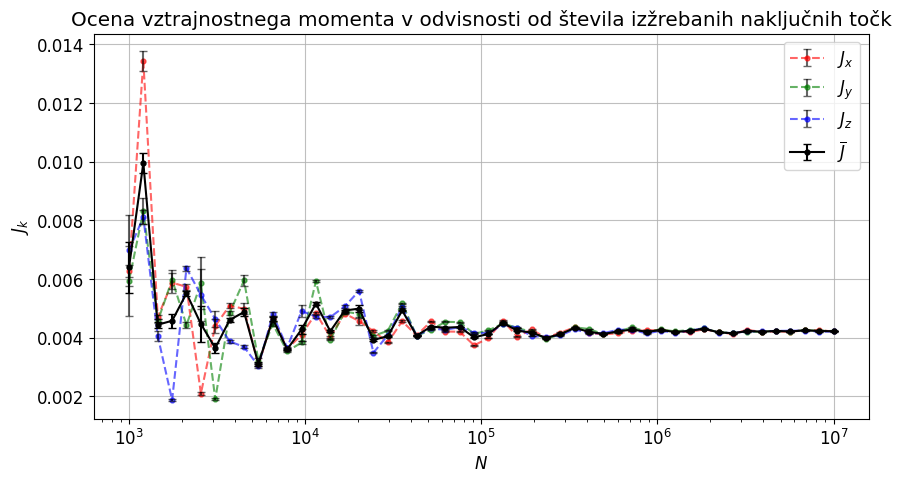

In [101]:
# Vztrajnostni moment

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_xscale('log')
ax.set_title('Ocena vztrajnostnega momenta v odvisnosti od števila izžrebanih naključnih točk')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$J_k$')
ax.errorbar(num_samples, inertias_x, yerr=inertias_x_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red', label=r'$J_x$', alpha=0.6, ls='--')
ax.errorbar(num_samples, inertias_y, yerr=inertias_y_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='green', label=r'$J_y$', alpha=0.6, ls='--')
ax.errorbar(num_samples, inertias_z, yerr=inertias_z_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='blue', label=r'$J_z$', alpha=0.6, ls='--')
ax.errorbar(num_samples, (inertias_x+inertias_y+inertias_z)/3., yerr=(inertias_z_err+inertias_x_err+inertias_y_err)/3, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='black', label=r'$\overline{J}$')
ax.legend()

print(inertias_x[-1], inertias_x_err[-1])
print(inertias_y[-1], inertias_y_err[-1])
print(inertias_z[-1], inertias_z_err[-1])
print((inertias_x+inertias_y+inertias_z)[-1]/3., (inertias_z_err+inertias_x_err+inertias_y_err)[-1]/3.)

-0.0007113287715591202
-0.0001467164795698506
-1.7195301329469888e-05
0.0007265053509871684


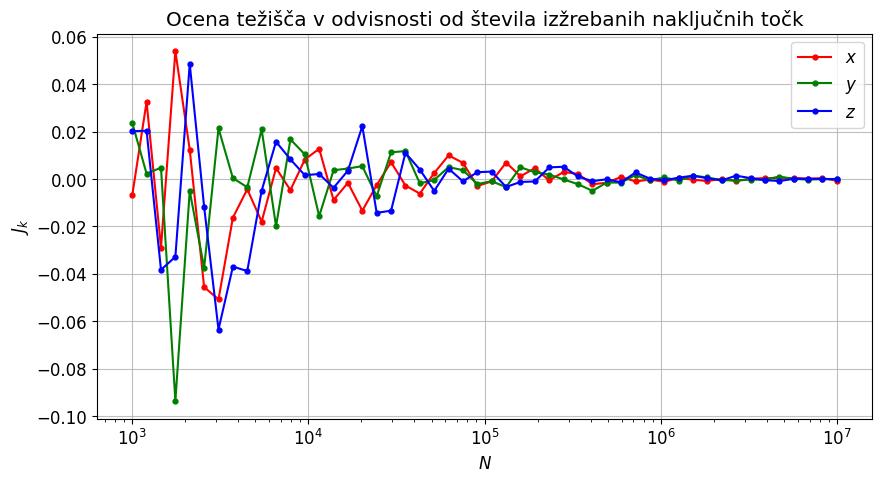

In [103]:
# Tezisce

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_xscale('log')
ax.set_title('Ocena težišča v odvisnosti od števila izžrebanih naključnih točk')
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$J_k$')
ax.plot(num_samples, centers_x, marker='.', markersize=7, color='red', label=r'$x$')
ax.plot(num_samples, centers_y, marker='.', markersize=7, color='green', label=r'$y$')
ax.plot(num_samples, centers_z, marker='.', markersize=7, color='blue', label=r'$z$')
ax.legend()

print(centers_x[-1])
print(centers_y[-1])
print(centers_z[-1])
print(np.sqrt(centers_x[-1]**2 + centers_y[-1]**2 + centers_z[-1]**2))

- v odvisnosti od parametra p

In [87]:
num_samples = int(10**7)

ps = np.arange(0, 11, 1, dtype=int)

masses_p = np.zeros_like(ps, dtype=float)
masses_p_err = np.zeros_like(ps, dtype=float)

inertias_x_p = np.zeros_like(ps, dtype=float)
inertias_y_p = np.zeros_like(ps, dtype=float)
inertias_z_p = np.zeros_like(ps, dtype=float)
inertias_x_p_err = np.zeros_like(ps, dtype=float)
inertias_y_p_err = np.zeros_like(ps, dtype=float)
inertias_z_p_err = np.zeros_like(ps, dtype=float)

for i, p in enumerate(ps):
    masses_p[i], masses_p_err[i] = estimate_mass(num_samples, p)
    inertias_x_p[i], inertias_y_p[i], inertias_z_p[i], inertias_x_p_err[i], inertias_y_p_err[i], inertias_z_p_err[i] = estimate_inertia(num_samples, p)

<ErrorbarContainer object of 3 artists>

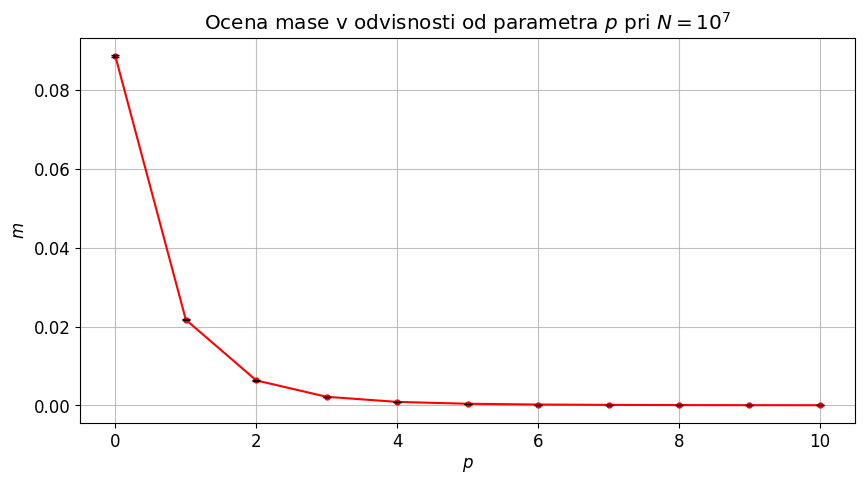

In [91]:
# Masa

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_title(r'Ocena mase v odvisnosti od parametra $p$ pri $N=10^7$')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$m$')
ax.errorbar(ps,masses_p, yerr=masses_p_err, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red')

<ErrorbarContainer object of 3 artists>

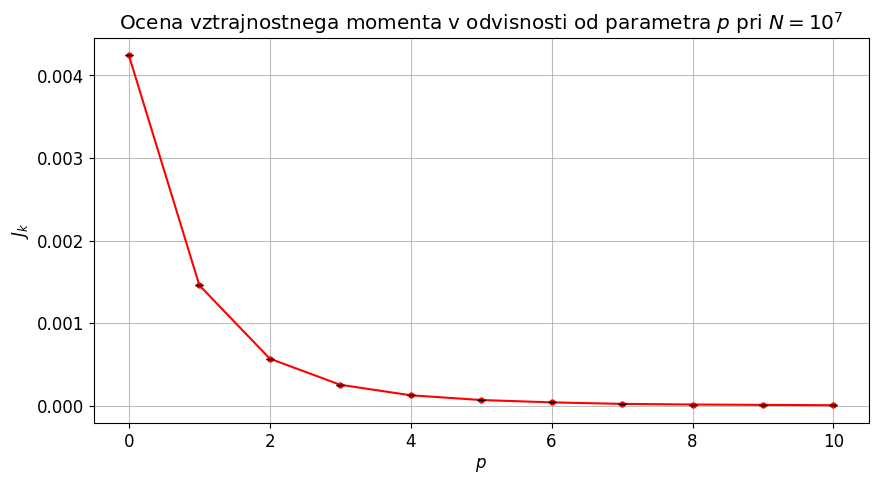

In [94]:
# Vztrajnostni moment

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_title(r'Ocena vztrajnostnega momenta v odvisnosti od parametra $p$ pri $N=10^7$')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$J_k$')
ax.errorbar(ps, (inertias_x_p+inertias_y_p+inertias_z_p)/3., yerr=(inertias_z_p_err+inertias_x_p_err+inertias_y_p_err)/3, capsize=3, marker='.', markersize=7, barsabove=True, ecolor='black', color='red', label=r'$\overline{J}$')

- histogramček

In [105]:
def estimate_mass2(num_samples, p=0):
    total_density = 0
    bounding_box_volumne = 8.

    for _ in range(num_samples):
        x, y, z = np.random.uniform(-1, 1, 3)
        if is_inside_body(x, y, z):

            total_density += density(x, y, z, p)

    total_mass = (bounding_box_volumne / num_samples) * total_density
    
    return total_mass

In [106]:
num_samples = int(10**7)

n = 500

masses_hist = np.zeros(n)

for i in range(n):
    masses_hist[i] = estimate_mass2(num_samples)

KeyboardInterrupt: 

In [99]:
print(masses_hist)

[0.0887096 0.0884584]
